# Tensor Basics

## Perform standard imports

In [ ]:
import torch
import numpy as np

In [ ]:
torch.__version__

'1.12.0+cu113'

## Converting NumPy arrays to PyTorch tensors
A <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor</tt></strong></a> is a multi-dimensional matrix containing elements of a single data type.<br>
Calculations between tensors can only happen if the tensors share the same dtype.<br>
In some cases tensors are used as a replacement for NumPy to use the power of GPUs .

In [ ]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [ ]:
x = torch.from_numpy(arr)
# Equivalent to x = torch.as_tensor(arr)

print(x)

tensor([1, 2, 3, 4, 5])


In [ ]:
# Print the type of data held by the tensor
print(x.dtype)

torch.int64


In [ ]:
# Print the tensor object type
print(type(x))

<class 'torch.Tensor'>


In [ ]:
np.arange(0.,12.)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
arr2 = np.arange(0.,12.).reshape(4,3)
print(arr2)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


In [ ]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


Here <tt>torch.DoubleTensor</tt> refers to 64-bit floating point data.

<h2><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a></h2>
<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

## Copying vs. sharing

<a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a><br>

There are a number of different functions available for <a href='https://pytorch.org/docs/stable/torch.html#creation-ops'>creating tensors</a>. When using <a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a>, the PyTorch tensor and the source NumPy array share the same memory. This means that changes to one affect the other. However, the <a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a> function always makes a copy.

In [ ]:
# Using torch.from_numpy()
arr = np.arange(0,5)
t = torch.from_numpy(arr)
print(t)

tensor([0, 1, 2, 3, 4])


In [ ]:
arr[2]=77
print(t)

tensor([ 0,  1, 77,  3,  4])


In [ ]:
# Using torch.tensor()
arr = np.arange(0,5)
t = torch.tensor(arr)
print(t)

tensor([0, 1, 2, 3, 4])


In [ ]:
arr[2]=77
print(t)

tensor([0, 1, 2, 3, 4])


## Creating tensors from scratch
### Uninitialized tensors with <tt>.empty()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.empty'><strong><tt>torch.empty()</tt></strong></a> returns an <em>uninitialized</em> tensor. Essentially a block of memory is allocated according to the size of the tensor, and any values already sitting in the block are returned. This is similar to the behavior of <tt>numpy.empty()</tt>.

In [ ]:
x = torch.empty(4, 3)
print(x)

tensor([[1.0994e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22]])


### Initialized tensors with <tt>.zeros()</tt> and <tt>.ones()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros'><strong><tt>torch.zeros(size)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones'><strong><tt>torch.ones(size)</tt></strong></a><br>
It's a good idea to pass in the intended dtype.

In [ ]:
x = torch.zeros(4, 3, dtype=torch.int64)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
x = torch.ones(4, 4)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


### Tensors from ranges
<a href='https://pytorch.org/docs/stable/torch.html#torch.arange'><strong><tt>torch.arange(start,end,step)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.linspace'><strong><tt>torch.linspace(start,end,steps)</tt></strong></a><br>
Note that with <tt>.arange()</tt>, <tt>end</tt> is exclusive, while with <tt>linspace()</tt>, <tt>end</tt> is inclusive.

In [ ]:
x = torch.arange(0,18,2).reshape(3,3)
print(x)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])


In [ ]:
x = torch.linspace(0,18,12).reshape(3,4)
print(x)

tensor([[ 0.0000,  1.6364,  3.2727,  4.9091],
        [ 6.5455,  8.1818,  9.8182, 11.4545],
        [13.0909, 14.7273, 16.3636, 18.0000]])


### Tensors from data
<tt>torch.tensor()</tt> will choose the dtype based on incoming data:

In [ ]:
x = torch.tensor([1, 2, 3, 4])
print(x)
print(x.dtype)
#changing datatypes
x.type(torch.int32)

tensor([1, 2, 3, 4])
torch.int64


tensor([1, 2, 3, 4], dtype=torch.int32)

You can also pass the dtype in as an argument. For a list of dtypes visit https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype<br>

In [ ]:
x = torch.tensor([8,9,-3], dtype=torch.int)
print(x)
print(x.dtype)

tensor([ 8,  9, -3], dtype=torch.int32)
torch.int32


### Random number tensors
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand'><strong><tt>torch.rand(size)</tt></strong></a> returns random samples from a uniform distribution over [0, 1)<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn'><strong><tt>torch.randn(size)</tt></strong></a> returns samples from the "standard normal" distribution [σ = 1]<br>
&nbsp;&nbsp;&nbsp;&nbsp;Unlike <tt>rand</tt> which is uniform, values closer to zero are more likely to appear.<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint'><strong><tt>torch.randint(low,high,size)</tt></strong></a> returns random integers from low (inclusive) to high (exclusive)

In [ ]:
x = torch.rand(4, 3)
print(x)

tensor([[0.6030, 0.2285, 0.8038],
        [0.1230, 0.7200, 0.3957],
        [0.7680, 0.6049, 0.2517],
        [0.2586, 0.7425, 0.6952]])


In [ ]:
x = torch.randn(4, 3)
print(x)

tensor([[ 0.2165, -0.0686,  0.2015],
        [ 0.7441,  0.7225,  1.4614],
        [-2.3071,  0.4702,  0.6524],
        [-0.4017, -0.5270,  1.1353]])


In [ ]:
x = torch.randint(0, 5, (4, 3))
print(x)

tensor([[3, 2, 0],
        [2, 3, 2],
        [3, 4, 3],
        [0, 2, 0]])


### Random number tensors that follow the input size
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand_like'><strong><tt>torch.rand_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn_like'><strong><tt>torch.randn_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint_like'><strong><tt>torch.randint_like(input,low,high)</tt></strong></a><br> these return random number tensors with the same size as <tt>input</tt>

In [ ]:
x = torch.zeros(2,5)
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
x2 = torch.randn_like(x)
print(x2)

tensor([[-0.4551,  0.0819,  2.0344, -0.7828, -0.0693],
        [-1.0297, -0.0456, -0.8849,  2.3125,  0.4777]])


The same syntax can be used with<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros_like'><strong><tt>torch.zeros_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones_like'><strong><tt>torch.ones_like(input)</tt></strong></a>

In [ ]:
x3 = torch.ones_like(x2)
print(x3)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


### Setting the random seed
<a href='https://pytorch.org/docs/stable/torch.html#torch.manual_seed'><strong><tt>torch.manual_seed(int)</tt></strong></a> is used to obtain reproducible results

In [ ]:
torch.manual_seed(42)
x = torch.rand(2, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


In [ ]:
torch.manual_seed(42)
x = torch.rand(2, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


# Tensor Operations


## Perform standard imports

In [ ]:
import torch
import numpy as np

## Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br>

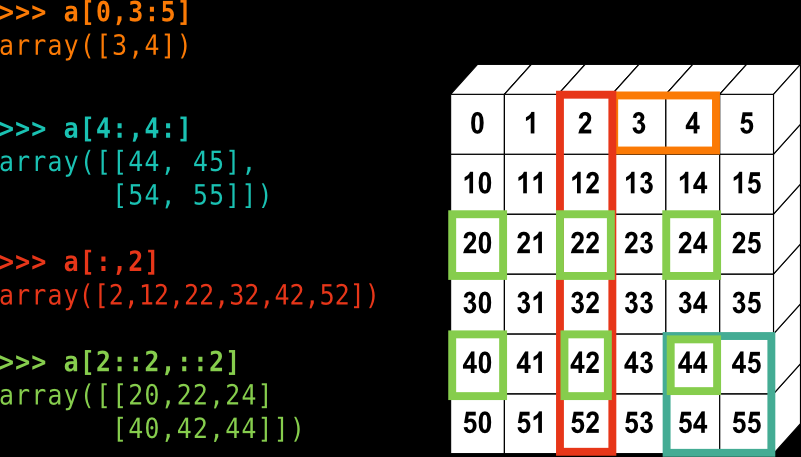

Image source: http://www.scipy-lectures.org/_images/numpy_indexing.png

In [ ]:
x = torch.arange(6).reshape(3,2)
print(x)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [ ]:
# Grabbing the right hand column values
x[:,1]

tensor([1, 3, 5])

In [ ]:
# Grabbing the right hand column as a (3,1) slice
x[:,1:]

tensor([[1],
        [3],
        [5]])

## Reshape tensors with <tt>.view()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.

In [ ]:
x = torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
x.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
x.view(5,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
# x is unchanged
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x = x.reshape(5,2)

In [ ]:
x

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

### Views reflect the most current data

In [ ]:
z = x.view(2,5)
x[0]=234
print(z)

tensor([[234, 234,   2,   3,   4],
        [  5,   6,   7,   8,   9]])


### Views can infer the correct size
By passing in <tt>-1</tt> PyTorch will infer the correct value from the given tensor

In [ ]:
x.view(2,-1)

tensor([[234, 234,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

In [ ]:
x.view(-1,5)

tensor([[234, 234,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a + b)

tensor([5., 7., 9.])


As arguments passed into a torch operation:

In [ ]:
print(torch.add(a, b))

tensor([5., 7., 9.])


With an output tensor passed in as an argument:

In [ ]:
result = torch.empty(3)
torch.add(a, b, out=result)  # equivalent to result=torch.add(a,b)
print(result)

tensor([5., 7., 9.])


Changing a tensor in-place

In [ ]:
a.add_(b)  # equivalent to a=torch.add(a,b)
print(a)

tensor([5., 7., 9.])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

#### Use the space below to experiment with different operations

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(torch.add(a,b).sum())

tensor(21.)


In [ ]:
torch.min(a) + b.max()

tensor(7.)

## Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # for reference
print()
print(a.dot(b))

tensor([ 4., 10., 18.])

tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication. We show matrix multiplication below.</div>

## Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>


$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

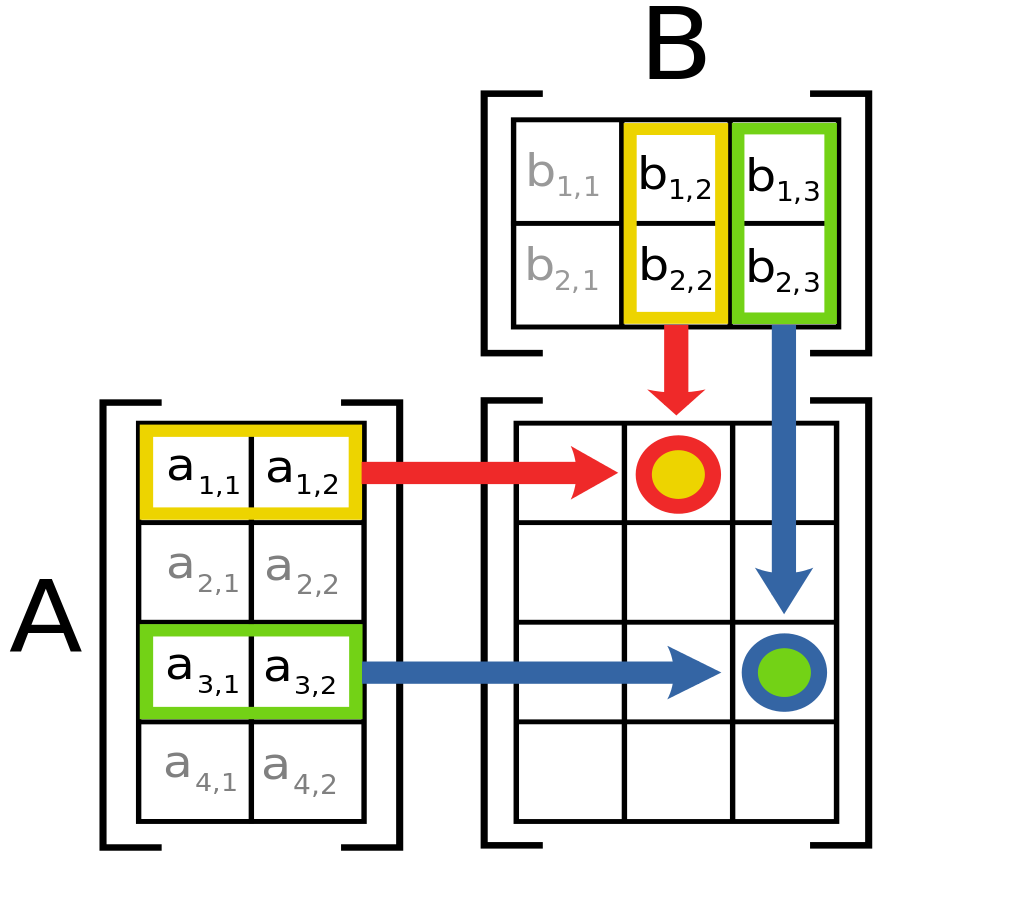

<div style="clear:both">Image source: <a href='https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg'>https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg</a></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [ ]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())
print('a x b: ',torch.mm(a,b).size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])


In [ ]:
print(torch.mm(a,b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(a.mm(b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(a @ b)

tensor([[56., 62.],
        [80., 89.]])


### Matrix multiplication with broadcasting
Matrix multiplication that involves <a href='https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics'>broadcasting</a> can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.matmul'><strong><tt>torch.matmul(a,b)</tt></strong></a> or `a.matmul(b)` or `a @ b`

In [ ]:
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 5)

print(torch.matmul(t1, t2).size())

torch.Size([2, 3, 5])


In [ ]:
t1 = torch.randn(2, 3)
t1

tensor([[ 0.7596,  0.7343, -0.6708],
        [ 2.7421,  0.5568, -0.8123]])

In [ ]:
t2 = torch.randn(3).reshape(3,1)
t2

tensor([[ 1.1964],
        [ 0.8613],
        [-1.3682]])

In [ ]:
print(torch.mm(t1, t2))

tensor([[2.4590],
        [4.8718]])


___
# Advanced operations

## L2 or Euclidian Norm
See <a href='https://pytorch.org/docs/stable/torch.html#torch.norm'><strong><tt>torch.norm()</tt></strong></a>

The <a href='https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm'>Euclidian Norm</a> gives the vector norm of $x$ where $x=(x_1,x_2,...,x_n)$.<br>
It is calculated as<br>

${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}}$


When applied to a matrix, <tt>torch.norm()</tt> returns the <a href='https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm'>Frobenius norm</a> by default.

In [ ]:
x = torch.tensor([2.,5.,8.,14.])
x.norm()

tensor(17.)

## Number of elements
See <a href='https://pytorch.org/docs/stable/torch.html#torch.numel'><strong><tt>torch.numel()</tt></strong></a>

Returns the number of elements in a tensor.

In [ ]:
x = torch.ones(3,7)
x.numel()

21

This can be useful in certain calculations like Mean Squared Error:<br>
<tt>
def mse(t1, t2):<br>
&nbsp;&nbsp;&nbsp;&nbsp;diff = t1 - t2<br>
    &nbsp;&nbsp;&nbsp;&nbsp;return torch.sum(diff * diff) / diff<strong>.numel()</strong></tt>

## References
- Some part of this notebook are from Jose Marcial Portilla works.